**Reading and Understanding the Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/AI4E/Data'
!ls

Mounted at /content/drive
/content/drive/MyDrive/AI4E/Data
Car.csv			 data_square.csv       housing.csv
data_linear.csv		 googleplaystore.csv   winequality-white.csv
data_linear_missing.csv  googleplaystore.xlsx


In [2]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
import re
from pandas import read_csv
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset = pd.read_csv('Car.csv')
dataset.head()

,car_ID,symboling,CarName,fueltype,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,two,convertible,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,two,convertible,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,two,hatchback,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,four,sedan,99.8,176.6,66.2,54.3,2337,2,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,four,sedan,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dataset.shape

(1401, 21)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            1401 non-null   int64  
 1   symboling         1401 non-null   int64  
 2   CarName           1401 non-null   object 
 3   fueltype          1401 non-null   object 
 4   doornumber        1401 non-null   object 
 5   carbody           1401 non-null   object 
 6   wheelbase         1401 non-null   float64
 7   carlength         1401 non-null   float64
 8   carwidth          1401 non-null   float64
 9   carheight         1401 non-null   float64
 10  curbweight        1401 non-null   int64  
 11  cylindernumber    1401 non-null   int64  
 12  enginesize        1401 non-null   int64  
 13  boreratio         1401 non-null   float64
 14  stroke            1401 non-null   float64
 15  compressionratio  1401 non-null   float64
 16  horsepower        1401 non-null   int64  


In [6]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.00000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.00000,1401.000000
mean,701.000000,0.738044,99.022769,174.328123,65.899714,53.870592,2563.222698,4.757316,126.635261,3.33192,3.262559,10.313419,103.053533,5104.246966,25.477516,30.96217,12947.879373
std,404.578175,1.233133,5.995116,12.179185,2.084768,2.432158,518.741334,1.382928,40.454671,0.26457,0.295429,4.170991,39.038580,478.764952,6.477518,6.87807,7598.145289
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.54000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.00000,5118.000000
25%,351.000000,0.000000,94.500000,166.300000,64.000000,52.000000,2145.000000,4.000000,97.000000,3.15000,3.120000,8.600000,70.000000,4800.000000,19.000000,25.00000,7799.000000
50%,701.000000,1.000000,97.200000,173.200000,65.500000,54.100000,2414.000000,4.000000,119.000000,3.31000,3.290000,9.000000,95.000000,5200.000000,25.000000,30.00000,9995.000000
75%,1051.000000,2.000000,102.400000,183.500000,66.900000,55.700000,3016.000000,6.000000,146.000000,3.59000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.00000,15998.000000
max,1401.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.94000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.00000,45400.000000


In [7]:
dataset = dataset.drop('car_ID',axis=1)
dataset['CarName'] = dataset['CarName'].str.split(' ',expand=True)
dataset['CarName'] = dataset['CarName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [8]:
dataset.head()

,symboling,CarName,fueltype,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,two,convertible,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,two,convertible,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,two,hatchback,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,four,sedan,99.8,176.6,66.2,54.3,2337,2,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,four,sedan,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


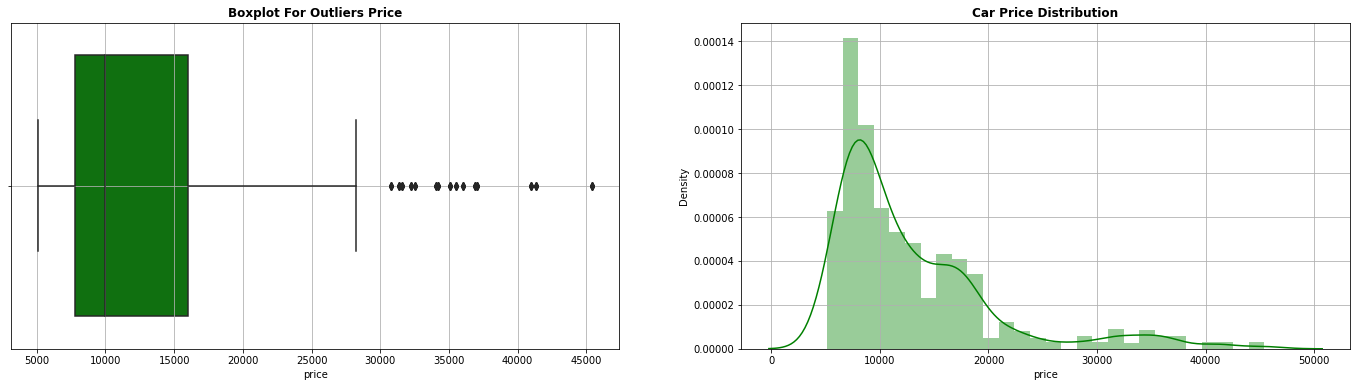

In [9]:
plt.figure(figsize=(24,6))
plt.subplot(1,2,1)
sns.boxplot(dataset["price"],color = 'g')
plt.grid(True)
plt.title("Boxplot For Outliers Price", fontweight="bold")

plt.subplot(1,2,2)
sns.distplot(dataset["price"],color = 'g')
plt.title("Car Price Distribution", fontweight="bold")
plt.grid(True)
plt.show()

In [10]:
col_categorical = list(dataset.select_dtypes(include="object"))
col_numeric = list(dataset.select_dtypes(exclude="object"))
print(col_categorical)
print(col_numeric)

['CarName', 'fueltype', 'doornumber', 'carbody']
['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


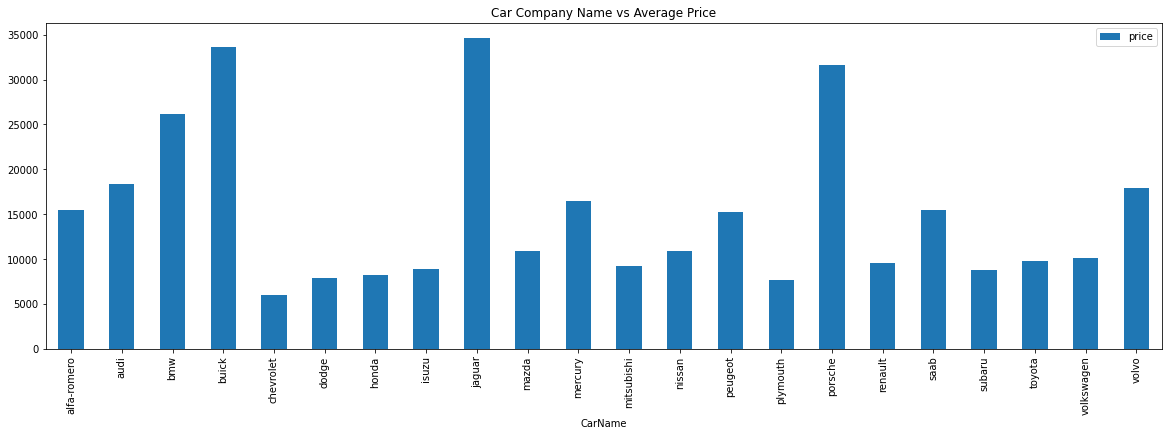

In [11]:
df_autox = pd.DataFrame(dataset.groupby(['CarName'])['price'].mean())
df_autox.plot.bar()
plt.gcf().set_size_inches(20, 6)
plt.title('Car Company Name vs Average Price')
plt.show()

Jaguar is the highest average price car

Nissan is the lowest average price car


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


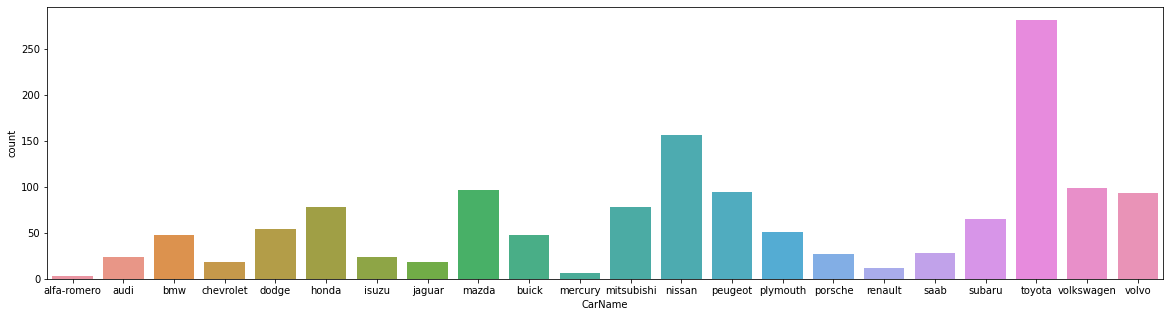

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(dataset['CarName'])
plt.show()

Toyota is the car with the most quantity

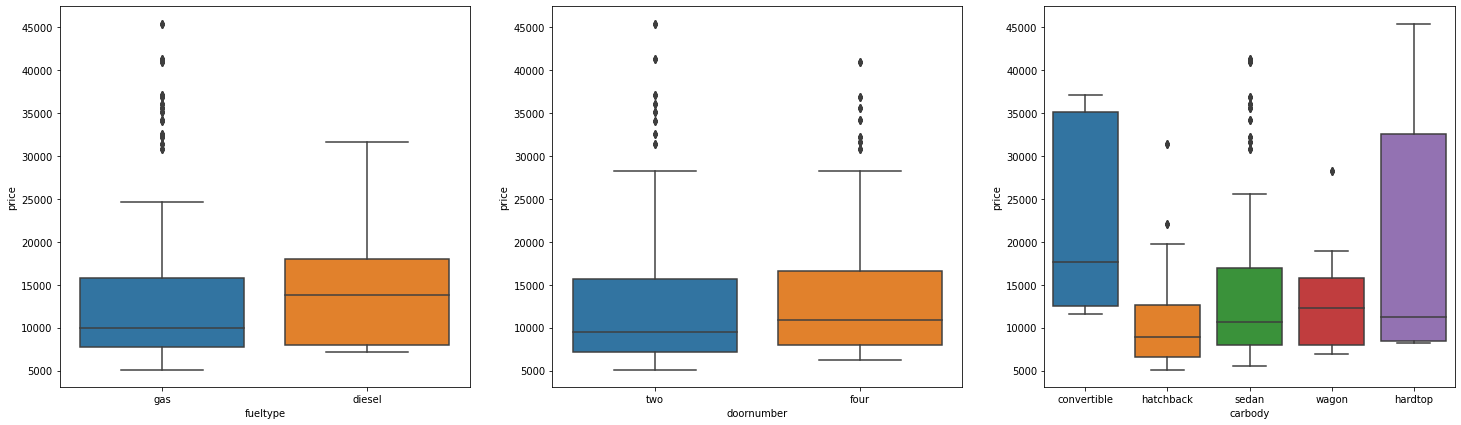

In [13]:
plt.figure(figsize=(25, 7))
plt.subplot(1,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = dataset)
plt.subplot(1,3,2)
sns.boxplot(x = 'doornumber', y = 'price', data = dataset)
plt.subplot(1,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = dataset)
plt.show()

Number of Gas fueled cars are way more than diesel fueled cars.
The number of cars using 4-door cars is more than 2-door cars.
Sedan is the most prefered car type.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


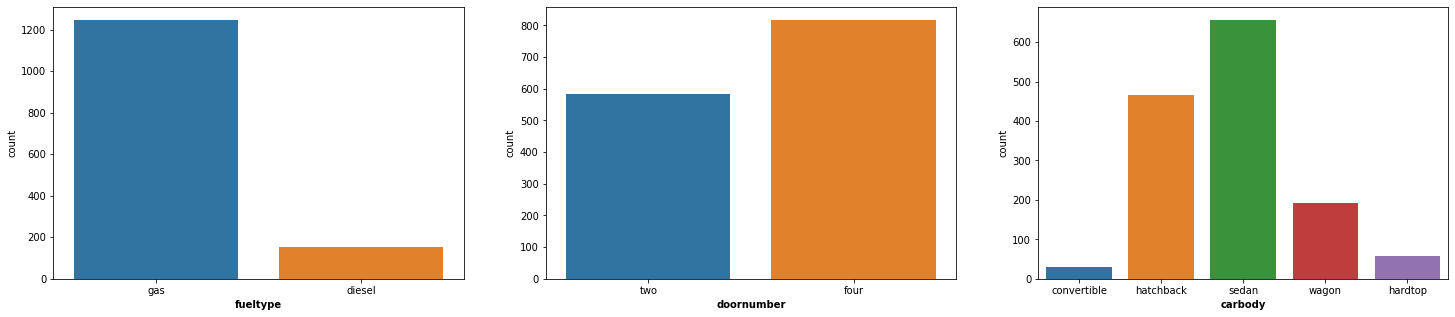

In [14]:
plt.figure(figsize=(25,5))
for i,col in enumerate(col_categorical[1:], start=1):
    plt.subplot(1,3,i)
    sns.countplot(dataset[col])
    plt.xlabel(col, fontweight="bold")
plt.show()

Number of Gas fueled cars are way more than diesel fueled cars.

The number of cars using 4-door cars is more than 2-door cars.

Sedan is the most prefered car type.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

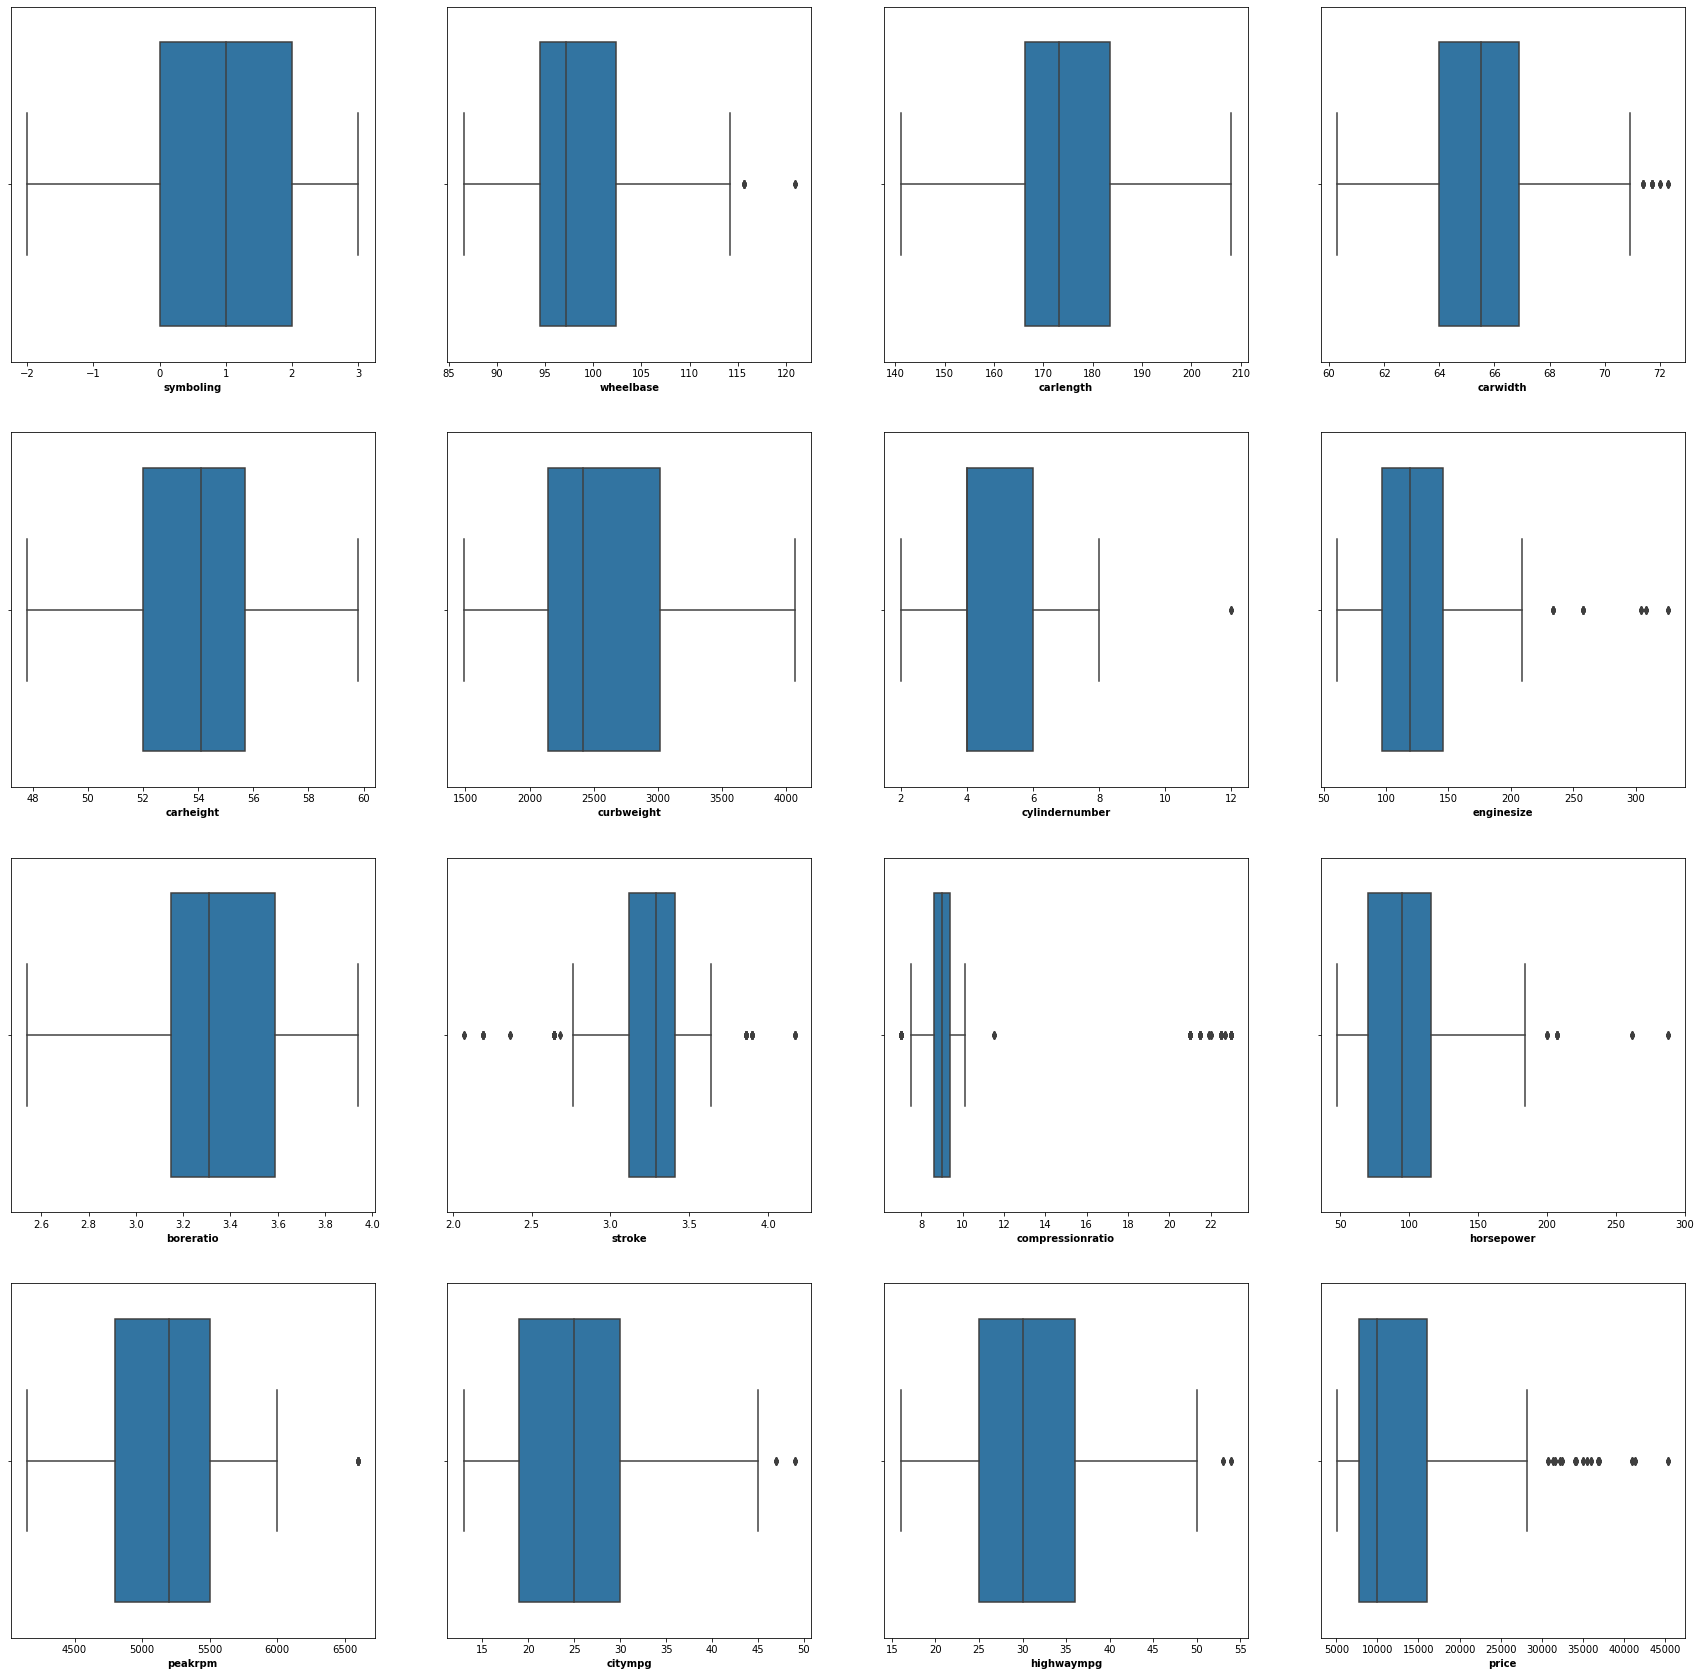

In [15]:
plt.figure(figsize=(30,30))
for i,col in enumerate(col_numeric, start=1):
    plt.subplot(4,4,i)
    sns.boxplot(dataset[col])
    plt.xlabel(col, fontweight="bold")
plt.show()

**Data Preparation**

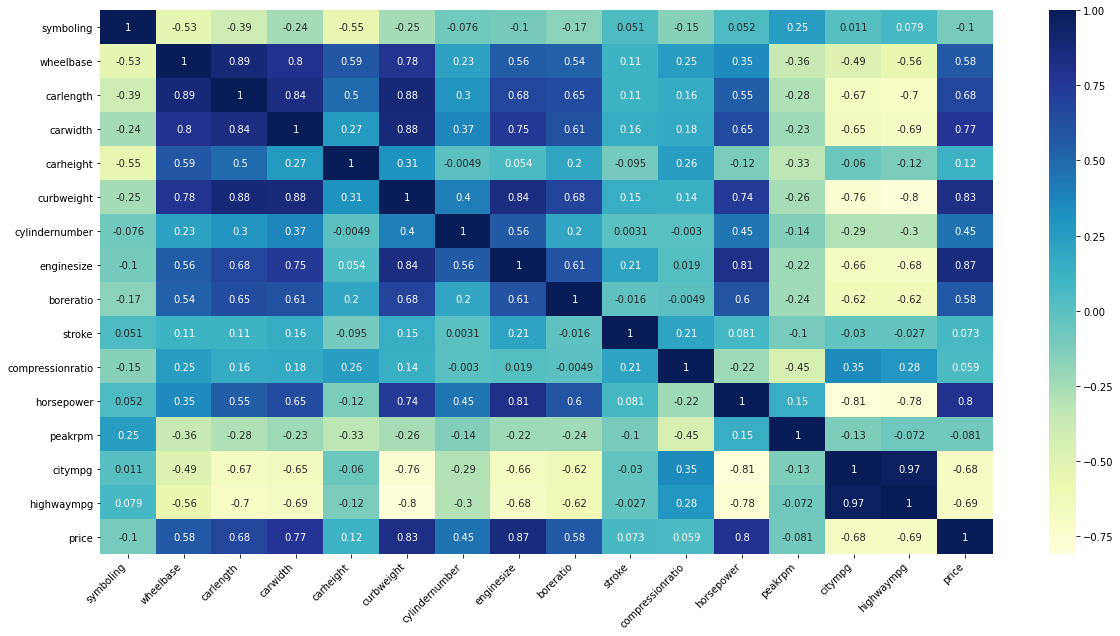

In [16]:
dataset.corr()
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(dataset.corr(),annot=True,cmap='YlGnBu')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Drop data with low correction 

In [17]:
dataset = dataset.drop(['symboling','carheight','cylindernumber','stroke','compressionratio' ,'peakrpm'], axis=1)
dataset.head()

,CarName,fueltype,doornumber,carbody,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,two,convertible,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,alfa-romero,gas,two,convertible,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,alfa-romero,gas,two,hatchback,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,audi,gas,four,sedan,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,audi,gas,four,sedan,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0



Dummy Variables
The variable carbody has five levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.

For this, we will use something called dummy variables.

In [18]:
sig_cat_col = ['CarName','fueltype','doornumber','carbody']
dummies = pd.get_dummies(dataset[sig_cat_col])
dummies

,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_diesel,fueltype_gas,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
1397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
1398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
1399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0


In [19]:
# Add the results to the original dataframe
dataset = pd.concat([dataset, dummies], axis = 1)
# Drop the original cat variables as dummies are already created
dataset.drop(sig_cat_col, axis = 1, inplace = True)
dataset.shape

(1401, 41)

In [20]:
dataset.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_diesel,fueltype_gas,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0


In [21]:
cat_features = ['wheelbase','carlength','carwidth','curbweight','curbweight','enginesize','horsepower','citympg','highwaympg','price']
for feature in cat_features:
    temp=dataset.groupby(feature)['price'].count()/len(dataset)
    temp_df=temp[temp>0.01].index

In [22]:
from sklearn.preprocessing import LabelEncoder
for feature in cat_features:
    le=LabelEncoder()
    dataset[feature]=le.fit_transform(dataset[feature])

In [23]:
dataset.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_diesel,fueltype_gas,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,2,22,8,92,18,3.47,30,8,10,118,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
1,2,22,8,92,18,3.47,30,8,10,137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
2,10,29,16,115,28,2.68,45,6,9,137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,45,21,66,11,3.19,27,11,13,123,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
4,28,45,23,116,22,3.19,33,5,5,148,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0


**Building a Model**

In [24]:
y = dataset.loc[:,dataset.columns == 'price']
X = dataset.loc[:,dataset.columns != 'price']

In [25]:
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [26]:
X_train.shape, X_validation.shape

((1120, 40), (281, 40))

**Run model with kfold = 10**

In [27]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [28]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [29]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: -191.719848 (40.545120)
LASSO: -347.811057 (46.404180)
EN: -345.308380 (46.065135)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: -42.059179 (29.675465)
CART: -7.521149 (3.850667)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

SVR: -460.960765 (68.729614)


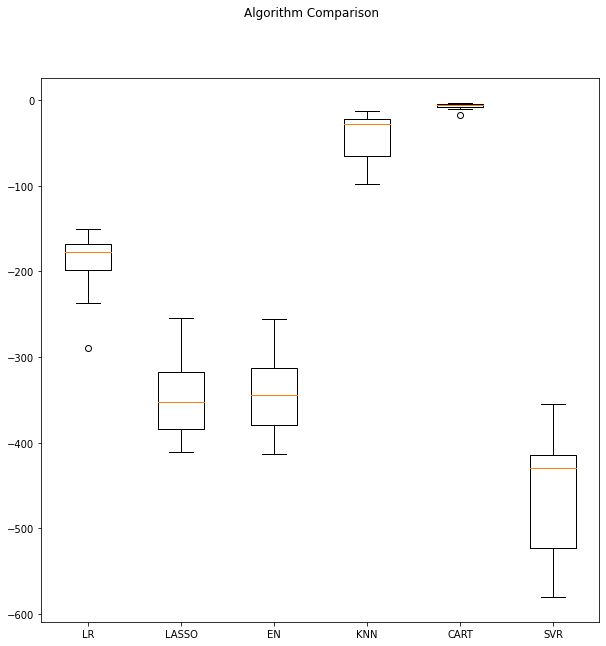

In [30]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**Compare algorithms**

In [31]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))

results = []

names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

ScaledAB: -195.849725 (18.413330)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

ScaledGBM: -54.564086 (11.897308)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

ScaledRF: -8.883930 (4.754095)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

ScaledET: -7.406237 (3.142815)


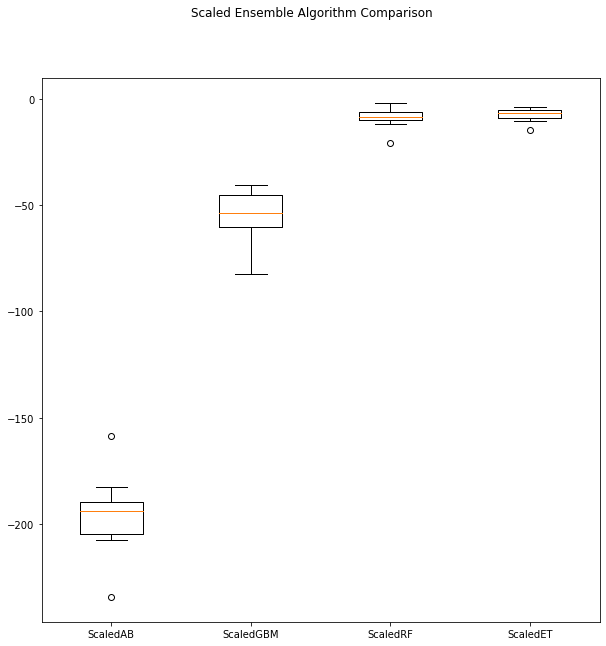

In [32]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [33]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([200,250,300,350,400,450,500,550,600]))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array

Best: -7.416381 using {'n_estimators': 250}
-7.432842 (3.470497) with: {'n_estimators': 200}
-7.416381 (3.458056) with: {'n_estimators': 250}
-7.492209 (3.612281) with: {'n_estimators': 300}
-7.521783 (3.660410) with: {'n_estimators': 350}
-7.519638 (3.701022) with: {'n_estimators': 400}
-7.529868 (3.679039) with: {'n_estimators': 450}
-7.565046 (3.716560) with: {'n_estimators': 500}
-7.589447 (3.752425) with: {'n_estimators': 550}
-7.577716 (3.731401) with: {'n_estimators': 600}


In [34]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=600)
model.fit(rescaledX, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=600, n_jobs=None, oob_score=False,
                    random_state=7, verbose=0, warm_start=False)

In [35]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

5.417916298530361
